<div align="center">
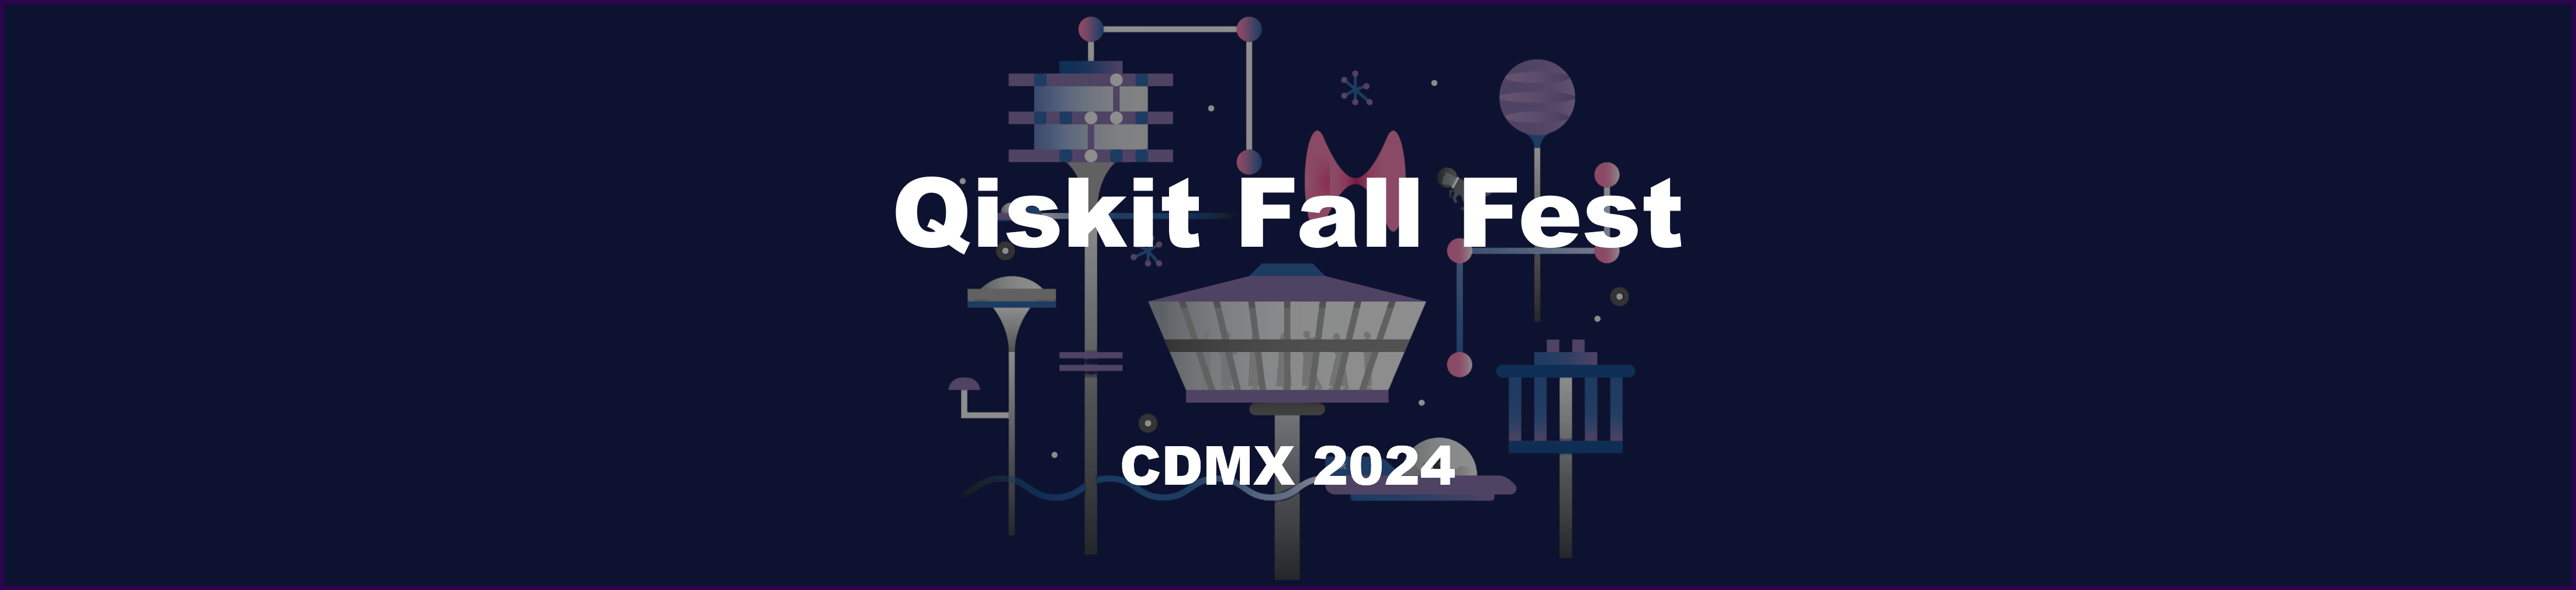

<table style="background-color: transparent;" width="100%">
    <tr style="background-color: transparent;">
        <td width="100%" align="center"><font size="6">Optimización Cuántica con Algoritmos Variacionales</font></td>
    </tr>
</table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

<div align="right" style=\font-size: 15px; font-weight: normal;">Por Claudia Zendejas-Morales&#160;&#160;</div>

</br>

<table style="background-color: transparent;" align="right">
    <tr style="background-color: transparent;">
        <td width="100%">
            <a target="_blank" href="https://opensource.org/licenses/Apache-2.0">
              <img src="https://img.shields.io/badge/license-Apache--2.0-green" alt="Licencia Apache 2.0">
            </a>
        </td>
    </tr>
</table>

## Contenido

1. [Introducción](#1)
   1. [Computación cuántica, ¿cómo la uso?](#1.1)
   2. [¿En dónde estamos actualmente?](#1.2)
   3. [Instalación de Qiskit](#1.3)
2. [Computación Cuántica](#2)
   1. [Qubit](#2.1)
      1. [Representación de los qubits: Matemáticamente](#2.1.1)
      2. [Representación de los qubits: Esfera de Bloch](#2.1.2)
      3. [Representación de los qubits: Qiskit](#2.1.3)
   2. [Circuito Cuántico](#2.2)
      1. [Orden de los qubits](#2.2.1)
   3. [Compuerta Cuántica](#2.3)
      1. [Representación de las compuertas: Matemáticamente](#2.3.1)
      2. [Compuertas de un sólo qubit](#2.3.2)
      3. [Compuertas de múltiples qubits](#2.3.3)
3. [Algoritmos Cuánticos Variacionales](#3)
   1. [Ejemplo sencillo](#3.1)
   2. [Quantum Machine Learning](#3.2)
      1. [Qiskit Machine Learning](#3.2.1)

<a id="1"></a>
# 1. Introducción

<a id="1.1"></a>
## 1.1. Computación cuántica, ¿cómo la uso?

La computación cuántica es una tecnología emergente que usa las leyes de la mecánica cuántica (**superposición, interferencia y entrelazamiento**) para resolver problemas complejos para las computadoras clásicas. Los dispositivos que realizan estos cálculos se le llama hardware cuántico.

Al igual que en la computación clásica, podemos crear **algoritmos cuánticos** para estas nuevas computadoras. Una forma popular de implementarlos es mediante circuitos cuánticos, que requieren **compuertas cuánticas** para su definición.


<a id="1.2"></a>
## 1.2. ¿En dónde estamos actualmente?

Las computadoras cuánticas actuales son pequeñas (pocos qubits) e inestables, sin superar a las tradicionales.

Hay dos factores limitantes en los problemas que pueden resolver:

1. **Cantidad de qubits**: Un **qubit** es un *bit cuántico*. Si no tenemos suficientes qubits, no podemos almacenar ni operar problemas grandes.
2. **Tasa de error**: Las computadoras cuánticas actuales son ruidosas y frecuentemente se equivocan, introduciendo "*ruido*" (información inútil).

Por ejemplo, para factorizar un número grande (617 dígitos) en menos de un día, se estiman necesarios ~20 millones de qubits ruidosos. Hasta septiembre de 2024, IBM ha creado una computadora de 1,121 qubits y planea sistemas más robustos. Otros algoritmos podrían ofrecer ventaja cuántica antes, como se menciona en el artículo de IBM: "[Evidence for the utility of quantum computing before fault tolerance](https://www.nature.com/articles/s41586-023-06096-3)".

Empresas están invirtiendo en algoritmos y computación cuántica para aprovechar esta ventaja.

Cualquiera puede crear y ejecutar algoritmos cuánticos para aprender a usar esta tecnología emergente.

<a id="1.3"></a>
## 1.3. Instalación de Qiskit

Se deben instalar los siguientes paquetes.

Al instalar desde un Jupyer Notebook, es usual usar `!` antes del comando `pip` para que la ejecución sea reconocida como un comando del shell y no como código de Python.

En Google Colab, siempre ejecutar la siguiente celda para instalar lo necesario.

In [1]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 101.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2613861de61aa6e5245329c8f3f6741f8dfa3921f2a2fda1211afb2ec4b62815
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


Comprobar que Qiskit está instalado: importar el paquete y verificar la versión:

In [2]:
import qiskit

In [3]:
qiskit.__version__    # 1.2.4  octube 2024

'2.2.1'

<a id="2"></a>
# 2. Computación Cuántica

<a id="2.1"></a>
## 2.1. Qubit

Al igual que en las computadoras digitales estándar (computadoras clásicas) la unidad fundamental son los **bits**, en las computadoras cuánticas tenemos a los **qubits**, una extensión del bit a la mecánica cuántica.

> Un qubit es un sistema mecánico cuántico de dos estados (o dos niveles) que pertenece a un espacio de Hilbert bidimensional (usa dos números complejos, $\mathbb{C}^2$).

<a id="2.1.1"></a>
### 2.1.1. Representación de los qubits: Matemáticamente

Para representar a los qubits de manera matemática, se utiliza la **[notación de Dirac](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation)**, también conoida como notación *bra-ket*.

El estado $\ket{0}$ se pronuncia "**ket 0**", y el estado $\ket{1}$ es "**ket 1**". Esto dos estados (o qubits) son ortogonales entre sí y forman una base $\{\ket{0}, \ket{1}\}$, llamada **base computacional**.

La notación de Dirac es una manera corta de escribir **vectores**:

$$\ket{\psi}=\left[ \begin{array}{r} \alpha \\ \beta\end{array} \right]$$

donde $\alpha,\beta\in\mathbb{C}$ y el ket $\ket{\psi}$ es la forma corta de escribir el estado de dos niveles (el vector).

Los elementos de la base computacional $\{\ket{0}, \ket{1}\}$, son los *vectores de estado*:

$$\ket{0}=\left[ \begin{array}{r} 1 \\ 0 \end{array} \right] ~~~~~~~~~~~~~~~~~~~~ \ket{1}=\left[ \begin{array}{r} 0 \\ 1 \end{array} \right]$$

Entonces, un qubit, es una **superposición** de los estados base, es decir, un qubit puede ser expresado como la [combinación lineal](https://en.wikipedia.org/wiki/Linear_combination) de $\ket{0}$ y $\ket{1}$:

$$\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$$

donde $\alpha$ y $\beta$ son [amplitudes de probabilidad](https://en.wikipedia.org/wiki/Probability_amplitude). Cuando medimos este qubit, la probabiliadad de obtener el estado $\ket{0}$ es de $|\alpha|^2$ y la probabilidad de obtener el estado $\ket{1}$ es de $|\beta|^2$. Debiéndose cumplir:

$$|\alpha|^2 + |\beta|^2 = 1$$

#### **Ejemplo:**

$$\ket{\psi}=\frac{\sqrt{3}}{2}\ket{0}+\frac{1}{2}\ket{1}=\left[ \begin{array}{c} \dfrac{\sqrt{3}}{2} \\\\ \dfrac{1}{2} \end{array} \right]$$

La probabilidad de observar el estado $\ket{0}$ es de $\left|\dfrac{\sqrt{3}}{2}\right|^2=\dfrac{3}{4}$, que es $75\%$.
    
La probabilidad de observar el estado $\ket{1}$ es de $\left|\dfrac{1}{2}\right|^2=\dfrac{1}{4}$, que es $25\%$.
    
La suma de las probabilidades para cada caso: $\dfrac{3}{4}+\dfrac{1}{4}=1$, que es $100\%$.</div>

<a id="2.1.2"></a>
### 2.1.2. Representación de los qubits: Esfera de Bloch

Debido a que un qubit se escribe,

$$\ket{\psi}=\left[ \begin{array}{r} \alpha \\ \beta \end{array} \right]$$

con $\alpha,\beta\in\mathbb{C}$, es decir, necesita dos números complejos, y a su vez cada número complejo necesita de 2 números reales para poder escribirlo, entonces, necesitamos en total $4$ números reales para representar a un qubit.

$$\alpha=a+bi$$

$$\beta=c+di$$

donde $a,b,c,d \in \mathbb{R}$.

Parece que se tienen $4$ grados de libertad para un qubit, sin embargo, un grado de libertad deja de ser *libre* debido a la restricción de normalización: $|\alpha|^2 + |\beta|^2 = 1$. Tenemos ahora 3 grados de libertad.

Entonces, utilizando una *transformación* de coordenadas conveniente, se puede eliminar ese grado de libertad, es decir, lograr la conversión de $\mathbb{R}^4\rightarrow\mathbb{R}^3$, mandando el espacio de $4$ dimensiones a la superficie de una esfera unitaria en $3$ dimensiones.

> La esfera de Bloch es una representación geométrica de un sistema mecánico cuántico de dos niveles (un quibit).

<div align="center">
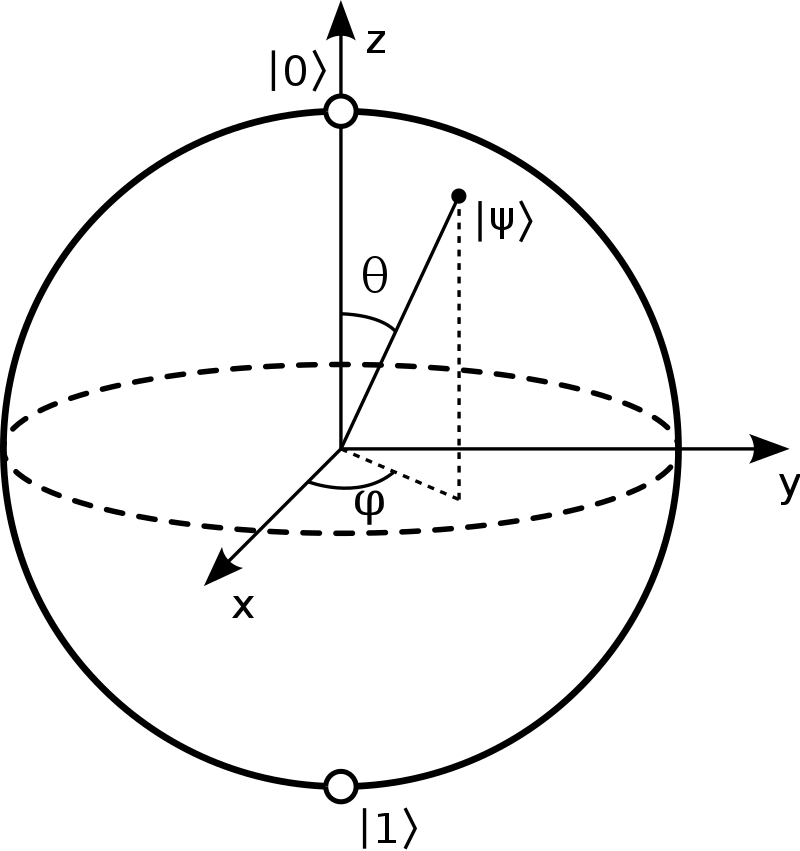

<p align="right" style="font-size:10px;font-style:italic;text-align:right"><a href="https://en.wikipedia.org/wiki/Bloch_sphere" target="_blank">Imagen obtenida de Wikipedia</a></p>

<a id="2.1.3"></a>
### 2.1.3. Representación de los qubits: Qiskit

En Qiskit podemos crear qubits con la clase `QuantumRegister` como sigue:

In [4]:
from qiskit import QuantumRegister

qubit1 = QuantumRegister(1)         # el parámetro indica cuántos qubits queremos

qubit2 = QuantumRegister(1, 'qreg') # se puede indicar un nombre al registro cuántico (parámetro opcional)

In [5]:
print(qubit1) # al no especificar el nombre, le asigna uno con una numeración consecutiva
print(qubit2)

QuantumRegister(1, 'q0')
QuantumRegister(1, 'qreg')


La base que usa **Qiskit**, es la **base computacional**: $\{\ket{0}, \ket{1}\}$.

<a id="2.2"></a>
## 2.2. Circuito Cuántico

Debemos tener en dónde usar los qubits, para eso contamos con el **circuito cuántico**.

> Un circuito cuántico es un modelo de computación cuántica, similar a los circuitos clásicos, en los que una computación es una secuencia de compuertas cuánticas, mediciones, inicializaciones de qubits a valores conocidos y posiblemente otras acciones.

Veamos cómo incluir en un circuito uno de los qubits que creamos anteriormente:

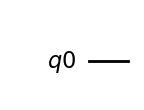

In [6]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(qubit1) # crear un circuito cuántico con un qubit (previamente definido)

circuit.draw('mpl')              # mostramos la representación gráfica del circuito

Otro ejemplo:

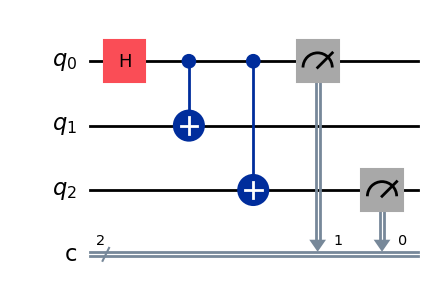

In [7]:
circ = QuantumCircuit(3, 2) # circuito con 3 qubits y 2 bits clásicos

circ.h(0)                   # aplicar compuerta H al qubit 0
circ.cx(0, 1)               # aplicar compuerta CNOT a los qubits 0 y 1
circ.cx(0, 2)               # aplicar compuerta CNOT a los qubits 0 y 2
circ.measure(0, 1)          # medir el qubit 0 en el bit clásico 1
circ.measure(2, 0)          # medir el qubit 2 en el bit clásico 0

circ.draw('mpl')            # mostrar el circuito

Como se mencionó, el tiempo ocurre de izquierda a derecha, entonces la compuerta $H$ es la que se aplica primero, y después la compuerta $CNOT_{0,1}$ y por último la compuerta $CNOT_{0,2}$, al final ocurren las mediciones.

Un importante punto a resaltar, es que *todos los qubits comienzan en el estado $\ket{0}$*.

<a id="2.2.1"></a>
### 2.2.1. Orden de los qubits

En el circuito anterior se tienen 3 qubits: $q_0$, $q_1$ y $q_2$. Al momento de hacer la relación con las expresiones matemáticas, debemos tomar en cuenta que, un estado de tres qubits tendrá el siguiente orden (respecto a la convención de Qiskit):

$$\ket{q_2 \, q_1 \, q_0}=\ket{000}$$

<a id="2.3"></a>
## 2.3. Compuerta Cuántica

Una vez que tenemos qubits en un circuito cuántico, lo siguiente es manipularlos, para lograr un objetivo, implementar algoritmos cuánticos. Esta manipulación de hace con las **compuertas cuánticas**.

> Las compuertas cuánticas son operadores unitarios y se describen como matrices unitarias en relación con alguna base. Usualmente se usa la base computacional.

Las compuertas cuánticas son los componentes básicos de los circuitos cuánticos, como lo son las compuertas lógicas clásicas para los circuitos digitales convencionales. A diferencia de muchas compuertas lógicas clásicas, las compuertas lógicas cuánticas son **reversibles**.

<a id="2.3.1"></a>
### 2.3.1. Representación de las compuertas: Matemáticamente

Una compuerta cuántica que actúa sobre $n$ qubits, esta representada por una matriz unitaria de $2^n\times 2^n$. Los vectores que representan estados cuánticos de dos niveles (qubits) sobre los que actúan las compuertas son vectores unitarios en $2^n$ dimensiones.

La acción de una compuerta en un estado cuántico específico se encuentra multiplicando el vector $\ket{\psi_1}$ que representa el estado, por la matriz $U$ que representa la compuerta. El resultado es un nuevo estado cuántico $\ket{\psi_2}$:

$$U\ket{\psi_1}=\ket{\psi_2}$$

Cuando tenemos un qubit, $n=1$, el vector que lo representa tiene dos elementos y una compuerta que opera sobre un qubit es una matriz de $2\times 2$, obtener el estado resultante de aplicar la compuerta será como sigue,

$$U\ket{\psi_1}= \mymatrix{rr}{ u_{11} & u_{12} \\ u_{21} & u_{22} }\mymatrix{r}{ \alpha \\ \beta }=\mymatrix{r}{ \alpha \, u_{11} + \beta \, u_{12} \\ \alpha \, u_{21} + \beta \, u_{22} }=\mymatrix{r}{ \alpha' \\ \beta' }=\ket{\psi_2}$$

<a id="2.3.2"></a>
### 2.3.2. Compuertas de un sólo qubit

### Compuertas de Pauli

Las **compuertas de Pauli** son las tres [matrices de Pauli](https://en.wikipedia.org/wiki/Pauli_matrices) ($\sigma_x, \sigma_y,\sigma_z$) y actúan sobre un solo quibit.

Las compuertas $X$, $Y$, $Z$, respectivamente, equivalen a una rotación de $\pi$ radianes (180°) al rededor del eje $x$, $y$, $z$ en la *esfera de Bloch*.

### Compuerta $X$

Esta compuerta es equivalente a la compuerta de negación ($NOT$) en las computadoras clásicas.

También es llamada *bit-flip* ya que mapea los estados base como sigue:

$$X\ket{0} = \ket{1}$$

$$X\ket{1} = \ket{0}$$

Su representación matricial es,

$$X=NOT=\mymatrix{rr}{ 0 & 1 \\ 1 & 0}$$

### **Ejemplo:**

Efecto de la compuerta $X$ sobre el estado $\ket{1}$
    
$$X\ket{1}= \mymatrix{rr}{ 0 & 1 \\ 1 & 0 }\mymatrix{r}{ 0 \\ 1 }=\mymatrix{r}{ 1 \\ 0 }=\ket{0}$$

En Qiskit aplicamos la compuerta $X$ con el método `x()`:

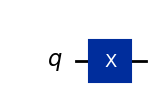

In [8]:
circ1 = QuantumCircuit(1) # circuito con 1 qubit

circ1.x(0)                # aplicar compuerta X al (único) qubit 0

circ1.draw('mpl')         # mostrar el circuito

### Obtener el vector de estado con Qiskit

Con la clase `Statevector` de Qiskit, se puede obtener el estado de un circuito en el punto que se desee:

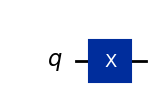

👉 Estado inicial:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>


👉 Estado después de X:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>

In [9]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex


circ1 = QuantumCircuit(1)    # circuito con 1 qubit

psi_0 = Statevector(circ1)   # estado justo después de crear el circuito

circ1.x(0)                   # aplicar compuerta X al (único) qubit 0

psi_1 = Statevector(circ1)   # estado después aplicar la compuerta X

display(circ1.draw('mpl'))   # mostrar el circuito

print("👉 Estado inicial:")
print("➤ en forma de vector:")
display(array_to_latex(psi_0.data))
print("➤ en forma de ket:")
display(psi_0.draw('latex'))
print()
print("👉 Estado después de X:")
print("➤ en forma de vector:")
display(array_to_latex(psi_1.data))
print("➤ en forma de ket:")
display(psi_1.draw('latex'))

### Visualización en la esfera de Bloch con Qiskit

Con la función `plot_bloch_multivector()` podemos visualizar un qubit, indicando el vector de estado.

🔵 Estado inicial:


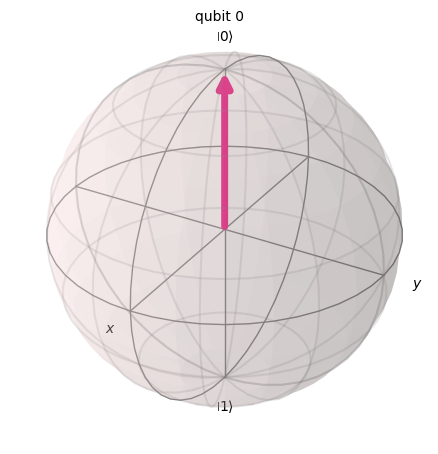

🔵 Estado después de X:


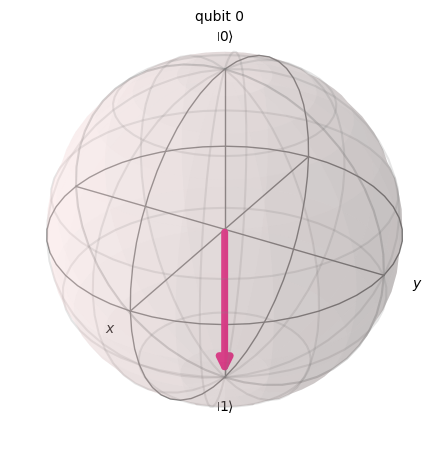

In [10]:
from qiskit.visualization import plot_bloch_multivector


print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de X:")
display(plot_bloch_multivector(psi_1))

### Compuerta $Y$

Esta compuerta mapea los estados base como sigue:

$$Y\ket{0}=i\ket{1}$$
$$Y\ket{1}=-i\ket{0}$$

Su representación matricial es,

$$Y=\mymatrix{rr}{ 0 & -i \\ i & 0}$$

En Qiskit aplicamos la compuerta $Y$ con el método `y()`.

### Compuerta $Z$

Esta compuerta mapea los estados base como sigue:

$$Z\ket{0}=\ket{0}$$
$$Z\ket{1}=-\ket{1}$$

Su representación matricial es,

$$Z=\mymatrix{rr}{ 1 & 0 \\ 0 & -1}$$

En Qiskit aplicamos la compuerta $Z$ con el método `z()`.

### Rotaciones con otros ángulos

Las compuertas de Pauli son rotaciones de $\pi$ radianes, pero podemos hacer que el estado cuántico rote con otros ángulos, para ello, tenemos las compuertas de rotaciones, alrededor de los ejes, definidas como sigue:

$$R_x(\phi) =\mymatrix{rr}{ \cos\left(\frac{\phi}{2}\right) & -i\sin\left(\frac{\phi}{2}\right) \\ -i\sin\left(\frac{\phi}{2}\right) & \cos\left(\frac{\phi}{2}\right) }$$

$$R_y(\phi) =\mymatrix{rr}{ \cos\left(\frac{\phi}{2}\right) & -\sin\left(\frac{\phi}{2}\right) \\ \sin\left(\frac{\phi}{2}\right) & \cos\left(\frac{\phi}{2}\right) }$$

$$R_z(\phi) =\mymatrix{cc}{ e^{-i\frac{\phi}{2}} & 0 \\ 0 & e^{i\frac{\phi}{2}} }$$

En Qiskit existen los métodos `rx()`, `ry()` y `rz()` para lograr las rotaciones con diferentes ángulos.

### Compuerta Hadamard

La compuerta Hadamard crea un estado de superposición de la base computacional $\{\ket{0}, \ket{1}\}$, entonces mapea los estados como sigue,

$$H\ket{0}=\ket{+}=\mymatrix{r}{\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} }$$

$$H\ket{1}=\ket{-}=\mymatrix{r}{\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} }$$

$$$$

La compuerta Hadamard también es una rotación, pero alrededor del eje $\frac{\left(\hat{x}+\hat{z}\right)}{\sqrt{2}}$, es decir, el eje en el plano $xz$ con 45° del estado $\ket{0}$

<div align="center">
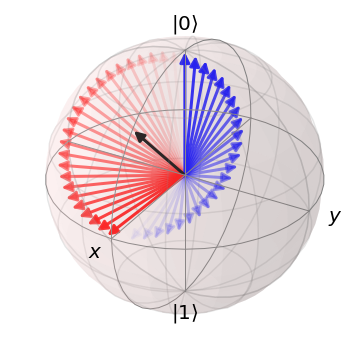

<p align="right" style="font-size:10px;font-style:italic;text-align:right"><a href="https://physics.stackexchange.com/questions/313959/visual-interpretation-on-the-bloch-sphere-when-hadamard-gate-is-applied-twice" target="_blank">Imagen obtenida de Physics StackExchange</a></p>

Su representación matricial es,

$$H =\frac{1}{\sqrt{2}} \mymatrix{rr}{1 & 1 \\ 1 & -1} = \mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}$$

En Qiskit aplicamos la compuerta $H$ con el método `h()`.

<a id="2.3.3"></a>
### 2.3.3. Compuertas de múltiples qubits

### Sistemas con más de un qubit

Hemos visto algunos efectos con qubits individuales y compuertas de un qubit, pero el verdadero poder de la computación cuántica se realiza a través de las interacciones entre qubits.

Por lo general, las compuertas que se pueden **implementar directamente en el hardware actuarán solo en uno o dos qubits**.

En nuestros circuitos, podemos querer usar compuertas complejas que actúen sobre una gran cantidad de qubits. Afortunadamente, esto no será un problema. Con las compuertas de uno y dos qubits que nos proporciona el hardware, es posible construir cualquier otra compuerta.

### Estados multi-qubit

La dimensión del espacio de Hilbert para $n$ qubits está dado por $2^n$. Para obtenerlo se usa el **producto tensorial** (o [producto de Kronecker](https://en.wikipedia.org/wiki/Kronecker_product)).

El producto tensorial, denotado por $\otimes$, se puede aplicar a vectores y matrices (en general a [tensores](https://en.wikipedia.org/wiki/Tensor)).

#### El espacio de 2 qubits

El espacio de Hilbert de un estado cuántico formado por dos qubits, $n=2$, tendrá una dimensión de $2^2=4$. Por ejemplo, el estado formado por dos qubits, cada uno en el estado $\ket{0}$ es,

$$\ket{0}\otimes\ket{0}=\ket{00}=\mymatrix{r}{ 1 \\ 0 }\otimes\mymatrix{r}{ 1 \\ 0 } =\mymatrix{r}{ 1\mymatrix{r}{ 1 \\ 0 } \\ 0\mymatrix{r}{ 1 \\ 0 } }=\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 }$$

Ahora, considerando todas las posibles combinaciones de los estados base para cada uno de los dos qubits, tenemos que,

$$\ket{0}\otimes\ket{0}=\ket{00} =\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 0 }$$

$$\ket{0}\otimes\ket{1}=\ket{01} =\mymatrix{r}{ 0 \\ 1 \\ 0 \\ 0 }$$

$$\ket{1}\otimes\ket{0}=\ket{10} =\mymatrix{r}{ 0 \\ 0 \\ 1 \\ 0 }$$

$$\ket{1}\otimes\ket{1}=\ket{11} =\mymatrix{r}{ 0 \\ 0 \\ 0 \\ 1 }$$

Notemos que debido a que estamos usando la *base computacional* para los qubits, podemos tener una relación directa con la representación de los números decimales en binario; es decir, el estado $\ket{00}$ tiene un $1$ en la posición $0$ del vector de estado de cuatro elementos, el estado $\ket{10}$ tienen un $1$ en la posición $2$ (contando desde cero), pues se cumple que $10_{binario} = 2_{decimal}$.

### Compuertas de un qubit en estados multi-qubit

Las compuertas de un solo qubit que actúan en estados multi-qubit, deben tener la dimension correcta para poder efectuar la multiplicación matriz por vector.

Si por ejemplo tenemos esto: $H\ket{q_1q_0}$, no se puede saber a cual de los dos qubits se le debe aplicar la compuerta $H$ si a $\ket{q_1}$ o a $\ket{q_0}$, entonces se debe ser explícito. Si lo que se desea es aplicar $H$ al $\ket{q_0}$ se debe escribir:

$$I\otimes H \; \ket{q_1q_0}$$

Lo que implica que se aplicará la compuerta *identidad* al $\ket{q_1}$, es decir, no será afectado.

La compuerta $I\otimes H$ a aplicar al estado de 2 qubits es:

$$I\otimes H =\mymatrix{r}{ 1 & 0 \\ 0 & 1 }\otimes\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}=\mymatrix{r}{ 1\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} & 0\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} \\ 0\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} & 1\mymatrix{rr}{\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}} }=\mymatrix{rrrr}{ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 \\ 0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} }$$

En Qiskit podemos usar la clase `Operator` para obtener el operador equivalente a las compuertas agregadas a un circuito, veamos le ejemplo anterior:

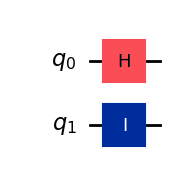

<IPython.core.display.Latex object>

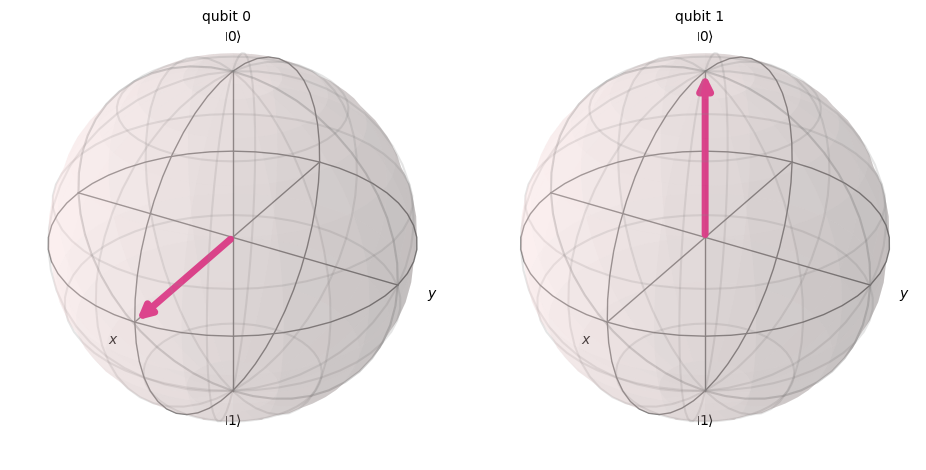

In [11]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Operator

circuit = QuantumCircuit(2) # circuito con 2 qubits

circuit.h(0)    # Hadamard en q0
circuit.id(1)   # Identidad en q1

display(circuit.draw('mpl'))

op = Operator(circuit)
display(array_to_latex(op))

psi = Statevector(circuit)

display(plot_bloch_multivector(psi))

Ejemplo con $3$ qubits $\ket{q_2 \, q_1 \, q_0}$:

$$H\otimes R_y(3\pi/5) \otimes R_x(\pi/4) \; \ket{000}$$

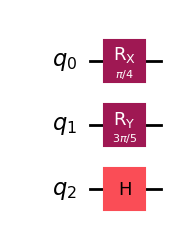

<IPython.core.display.Latex object>

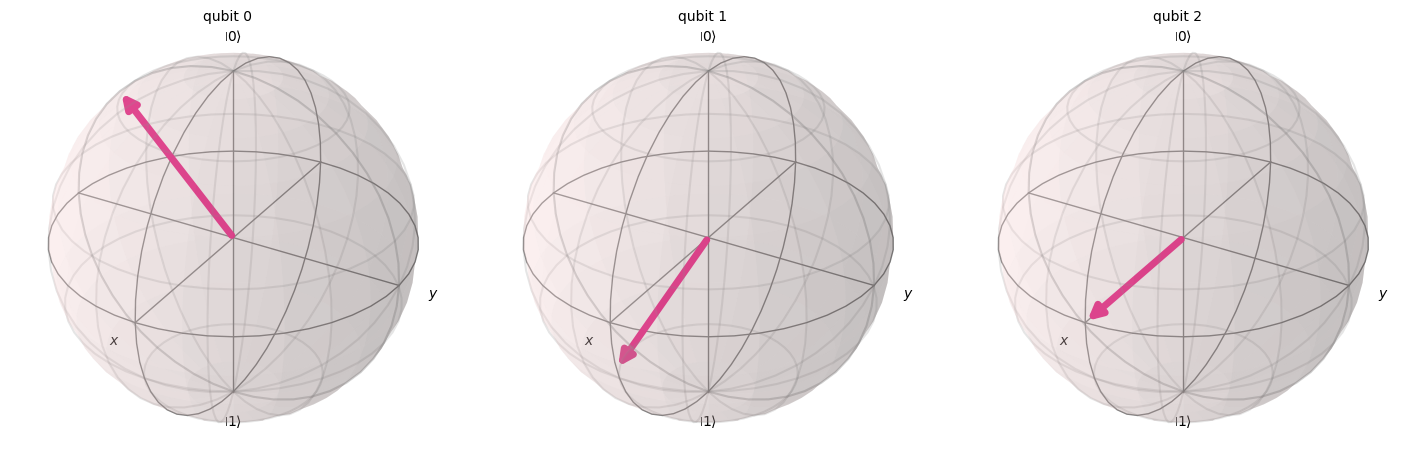

In [12]:
import numpy as np

circuit = QuantumCircuit(3) # circuito con 3 qubits

circuit.rx(np.pi/4, 0)      # Rx de pi/4  al q0
circuit.ry(3*np.pi/5, 1)    # Ry de 3pi/5 al q1
circuit.h(2)                # Hadamard al q2

display(circuit.draw('mpl'))

op = Operator(circuit)
display(array_to_latex(op))

psi = Statevector(circuit)

print()
display(plot_bloch_multivector(psi))

### Compuertas de dos qubits

Ahora que ya sabemos cómo son los estados multi-qubit, podemos revisar las compuertas que son aplicadas a más de un qubit. Primero veamos algunas compuertas que necesitan dos qubits para operar.

#### Compuerta $CNOT$ o $CX$

Se trata de una compuerta controlada, actúa sobre dos qubits, en donde uno de ellos sirve como control y el otro como el objetivo.

Se aplicará una operación $NOT$ o $X$ en el qubit objetivo, solo cuando el qubit control sea $\ket{1}$.

Si el qubit de la izquierda ($\ket{q_1}$) es el control y el de la derecha ($\ket{q_0}$) es el objetivo, en el estado $\ket{q_1q_0}$, las transiciones son:

$$CNOT_{1,0}\ket{00}=\ket{00}$$
$$CNOT_{1,0}\ket{01}=\ket{01}$$
$$CNOT_{1,0}\ket{10}=\ket{11}$$
$$CNOT_{1,0}\ket{11}=\ket{10}$$

donde los subíndices en $CNOT$ indican el qubit control y el objetivo, en ese orden.

Dado esto podríamos tener otra versión del $CNOT$ en donde el qubit control sea $q_0$ y el objetivo sea $q_1$, las transiciones para este caso serían,

$$CNOT_{0,1}\ket{00}=\ket{00}$$
$$CNOT_{0,1}\ket{01}=\ket{11}$$
$$CNOT_{0,1}\ket{10}=\ket{10}$$
$$CNOT_{0,1}\ket{11}=\ket{01}$$

El order predeterminado en la mayoría de las referencias es que el qubit de la izquierda es el control, mientras que el de la derecha es el objetivo.

En Qiskit se cuenta con el método `cx(c, t)`, que recibe el qubit de control como primer parámetro y el qubit objetivo como segundo parámetro.

Este es el caso para CNOT(0,1)|01> = |11>


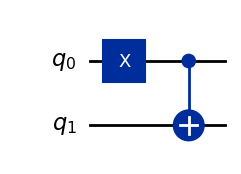

<IPython.core.display.Latex object>

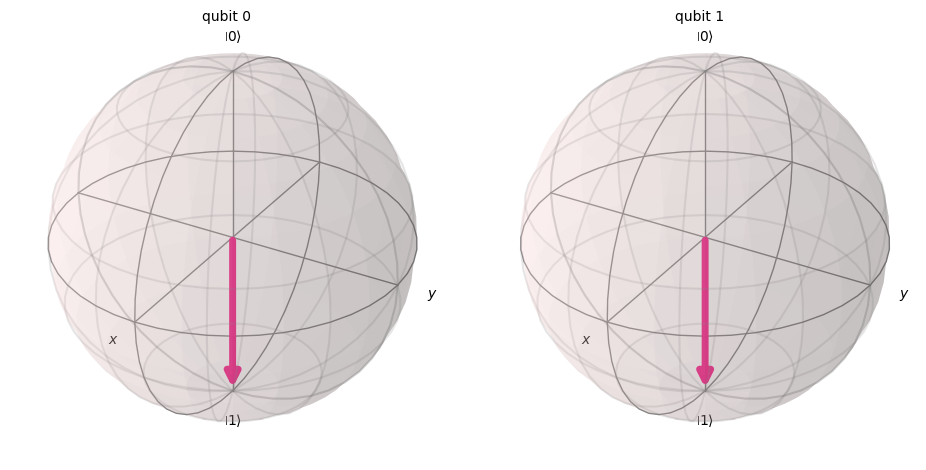

In [13]:
circ7 = QuantumCircuit(2)   # circuito con 2 qubits

circ7.x(0)                  # ponemos el control en |1> para que la compuerta sea aplicada

circ7.cx(0, 1)              # CNOT con q0 como control y q1 como objetivo

print("Este es el caso para CNOT(0,1)|01> = |11>")

display(circ7.draw('mpl'))

op = Operator(circ7)
display(array_to_latex(op))

psi = Statevector(circ7)

print()
display(plot_bloch_multivector(psi))

#### Compuertas controladas

Así como podemos controlar si aplicar la compuerta $X$ de acuerdo al estado de un qubit control, podemos controlar cualquier otra compuerta. Si tenemos la compuerta $U$, su versión controlada sería $CU$, y podemos decidir cual qubit es el control y cual es el objetivo (como para el caso de $CNOT$).

Una operación unitaria en general la podemos escribir como,

$$U =\mymatrix{rr}{ u_{11} & u_{12} \\ u_{21} & u_{22} }$$

Entonces su versión controlada $CU$, si el control es el qubit de la izquierda ($\ket{q_1}$), tendría las transiciones:

$CU_{1,0}\ket{00}=\ket{00}$

$CU_{1,0}\ket{01}=\ket{01}$

$CU_{1,0}\ket{10}=\ket{1}\otimes U\ket{0}=\ket{1}\otimes \left(u_{11}\ket{0}+u_{21}\ket{1}\right)$

$CU_{1,0}\ket{11}=\ket{1}\otimes U\ket{0}=\ket{1}\otimes \left(u_{12}\ket{0}+u_{22}\ket{1}\right)$

Su forma matricial es,

$$CU= \mymatrix{rrrr}{ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & u_{11} & u_{12} \\ 0 & 0 & u_{21} & u_{22} }$$

En Qiskit existen varias compuertas controladas predefinidas, en el siguiente código se usarán algunas a modo de ejemplo:

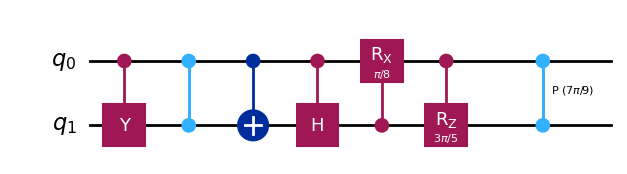

In [14]:
circ9 = QuantumCircuit(2)    # circuito con 2 qubits

circ9.cy(0, 1)               # Y controlada, qubit control es q0, y objetivo es q1
circ9.cz(1, 0)               # Z controlada, qubit control es q1, y objetivo es q0
circ9.cx(0, 1)               # X controlada, qubit control es q0, y objetivo es q1

circ9.ch(0, 1)               # H controlada, qubit control es q0, y objetivo es q1

circ9.crx(np.pi/8, 1, 0)     # Rx controlada, ángulo de pi/8, qubit control es q1, y objetivo es q0
circ9.crz(3*np.pi/5, 0, 1)   # Rz controlada, ángulo de 3pi/5, qubit control es q0, y objetivo es q1

circ9.cp(7*np.pi/9, 1, 0)    # P controlada, ángulo de 7pi/9, qubit control es q1, y objetivo es q0

display(circ9.draw('mpl'))

#### Compuerta $SWAP$

Esta compuerta es la única compuerta de dos qubits que no representa una operación controlada. $SWAP$ simplemente intercambia dos qubits. Es muy útil cuando se tiene restricción fisica en las conexiones entre qubits.

Sus transiciones son entonces,

$$SWAP \, \ket{00}=\ket{00}$$
$$SWAP \, \ket{01}=\ket{10}$$
$$SWAP \, \ket{10}=\ket{01}$$
$$SWAP \, \ket{11}=\ket{11}$$

Su representación matricial es,

$$SWAP= \mymatrix{rrrr}{ 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 }$$

En Qsikit la podemos usar con `swap()` como sigue:

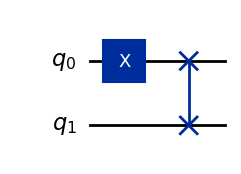


🔵 Estado inicial:


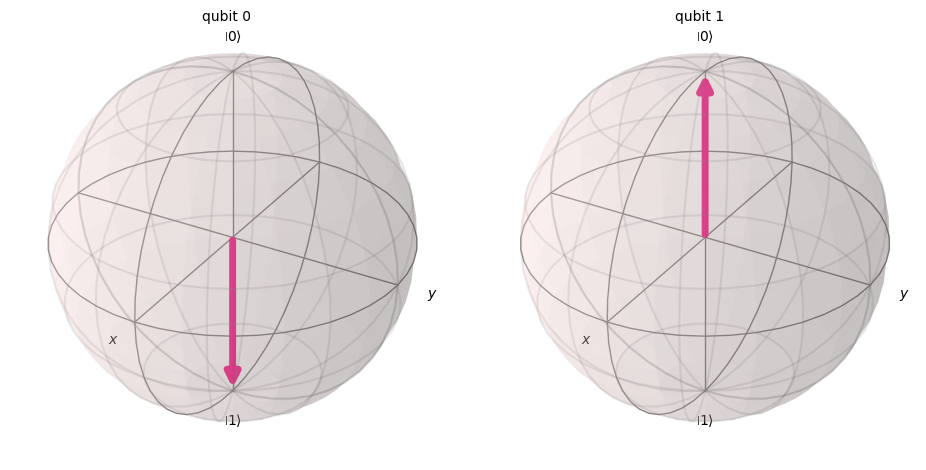

🔵 Estado después de SWAP:


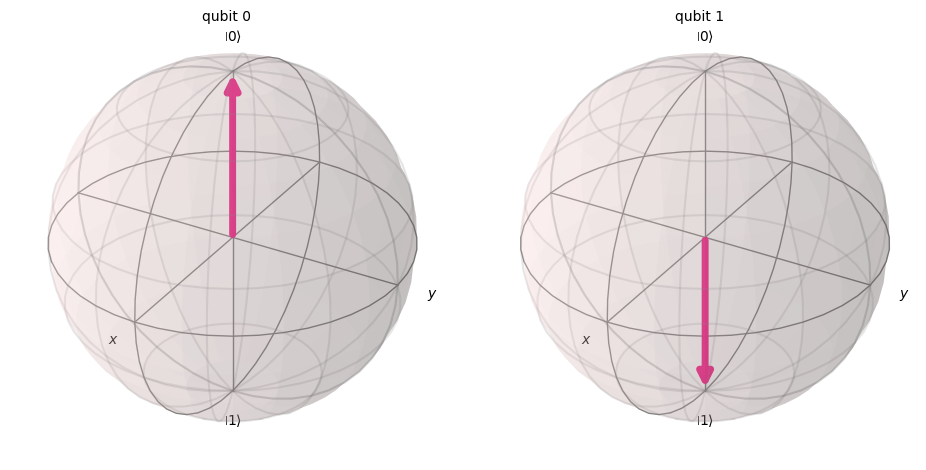

In [15]:
circ11 = QuantumCircuit(2)    # circuito con 2 qubit

circ11.x(0)                   # obtener el estado |01>

psi_0 = Statevector(circ11)   # estado justo después de crear el circuito e iniciar el qubit en |01>

circ11.swap(0, 1)             # aplicar compuerta SWAP a los dos quibits existentes

psi_1 = Statevector(circ11)   # estado después aplicar la compuerta Z

display(circ11.draw('mpl'))   # mostrar el circuito

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de SWAP:")
display(plot_bloch_multivector(psi_1))

### Compuertas de más qubits

Las compuertas pueden estar definidas para $n$ cantidad de qubits, siempre y cuando su matriz sea unitaria. Las compuertas de más de dos qubits suelen ser compuertas con más de un control.

### Compuerta Toffoli , $CCNOT$ o $CCX$

Es una compuerta de 3 qubits. Aplicará un $NOT$ si los dos qubits de control están en el estado $\ket{1}$, en caso contrario no aplicará ninguna operación.

Su forma matricial para el caso de que los dos qubits de la izquierda sean los controles, y el de más a la derecha sea el objetivo es como sigue,

$$CCX =\mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0}$$

Entonces sus transiciones son,

$$CCX \, \ket{000} = \ket{000}$$
$$CCX \, \ket{001} = \ket{001}$$
$$CCX \, \ket{010} = \ket{010}$$
$$CCX \, \ket{011} = \ket{011}$$
$$CCX \, \ket{100} = \ket{100}$$
$$CCX \, \ket{101} = \ket{101}$$
$$CCX \, \ket{110} = \ket{111}$$
$$CCX \, \ket{111} = \ket{110}$$

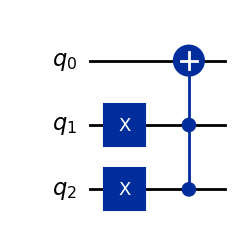


🔵 Estado inicial:


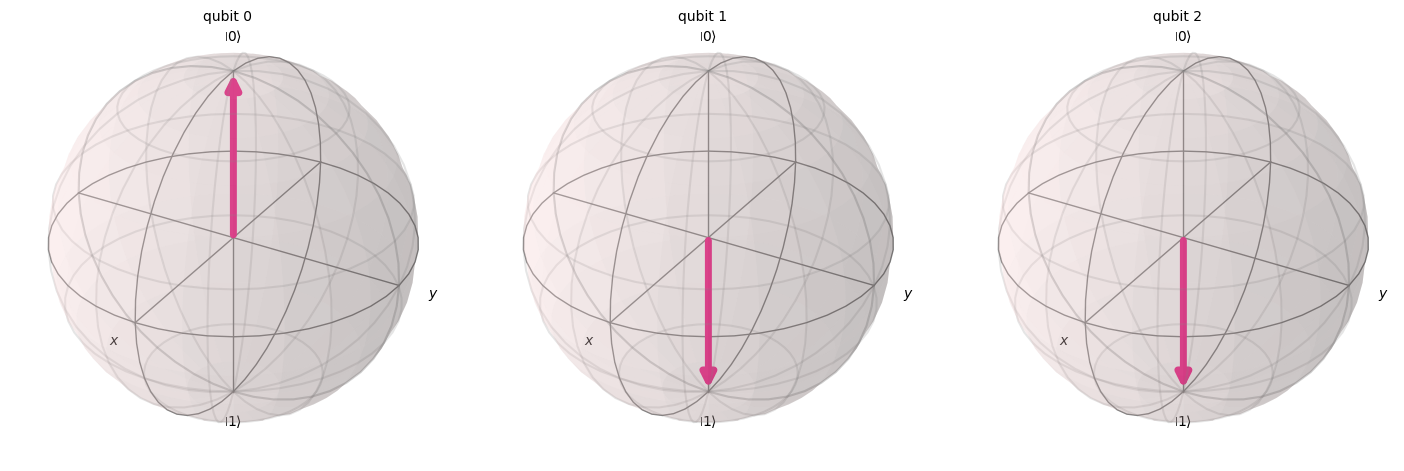

🔵 Estado después de CCX(1, 2, 0):


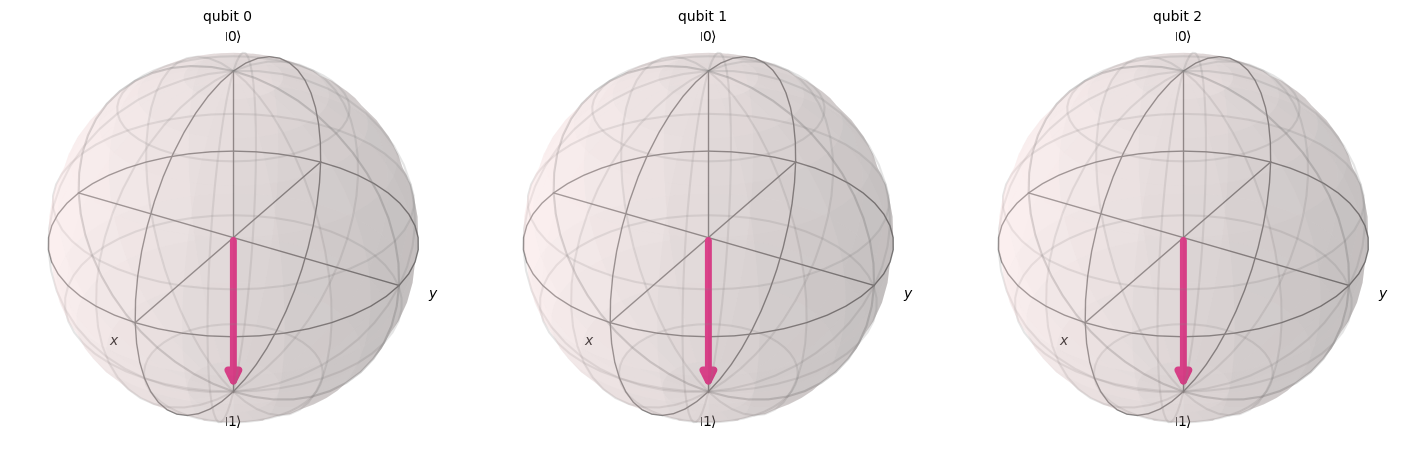

In [16]:
circ12 = QuantumCircuit(3)    # circuito con 3 qubit

circ12.x(1)                   # obtener el estado |010>
circ12.x(2)                   # obtener el estado |110>

psi_0 = Statevector(circ12)   # estado justo después de crear el circuito e iniciar el qubit en |110>

circ12.ccx(1, 2, 0)           # aplicar compuerta CCX: control1, control2, objetivo

psi_1 = Statevector(circ12)   # estado después aplicar la compuerta Z

display(circ12.draw('mpl'))   # mostrar el circuito

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de CCX(1, 2, 0):")
display(plot_bloch_multivector(psi_1))

#### Compuerta Fredkin o $CSWAP$

Esta compuerta tiene un qubit de control, y si está en el estado $\ket{1}$, entonces se efectúa un $SWAP$ a los dos quibits objetivo. La forma matricial es como sigue:

$$CSWAP =\mymatrix{cccccccc}{1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1}
$$

Entonces sus transiciones son,

$$CSWAP \ket{000} = \ket{000}$$
$$CSWAP \ket{001} = \ket{001}$$
$$CSWAP \ket{010} = \ket{010}$$
$$CSWAP \ket{011} = \ket{011}$$
$$CSWAP \ket{100} = \ket{100}$$
$$CSWAP \ket{101} = \ket{110}$$
$$CSWAP \ket{110} = \ket{101}$$
$$CSWAP \ket{111} = \ket{111}$$
    

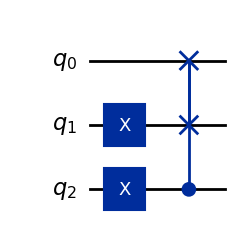


🔵 Estado inicial:


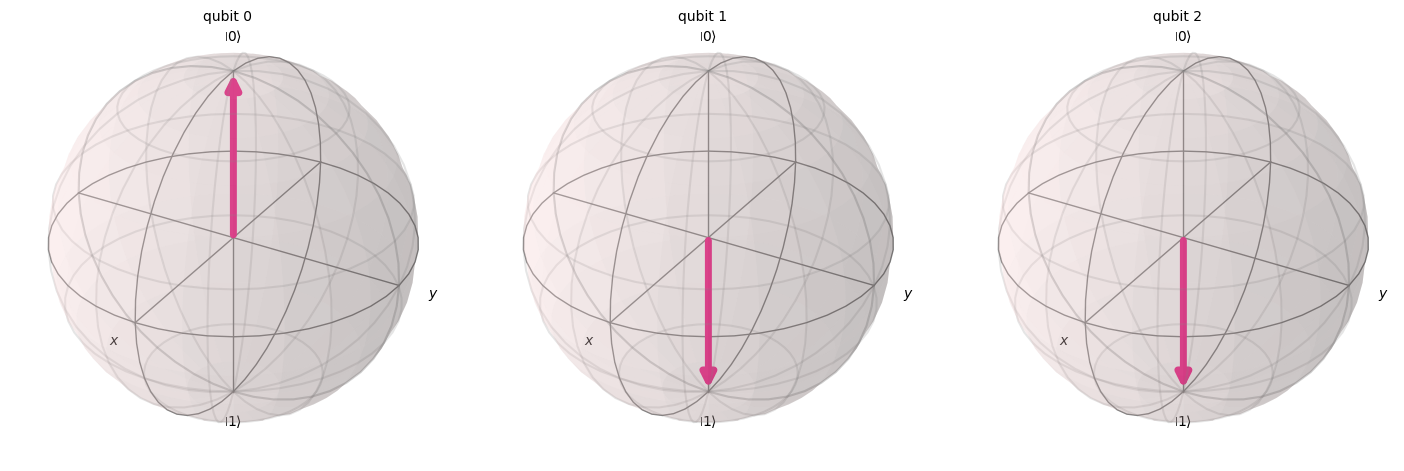

🔵 Estado después de SWAP(2, 0, 1):


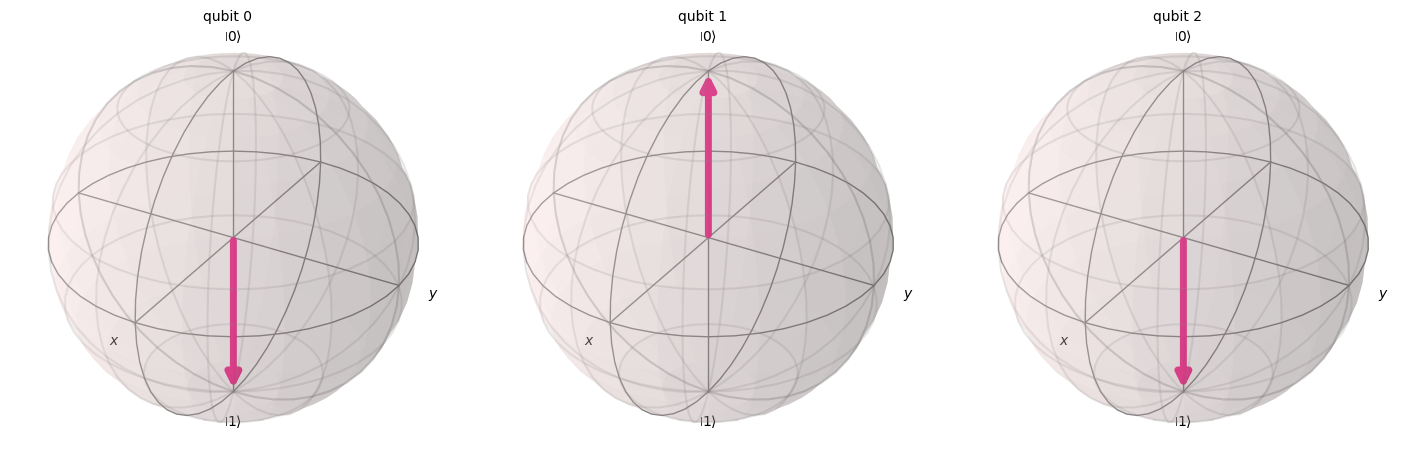

In [17]:
circ13 = QuantumCircuit(3)    # circuito con 3 qubit

circ13.x(2)                   # obtener el estado |100>
circ13.x(1)                   # obtener el estado |110>

psi_0 = Statevector(circ13)   # estado justo después de crear el circuito e iniciar el qubit en |110>

circ13.cswap(2, 0, 1)         # aplicar compuerta CCX: control1, objetivo1, objetivo2

psi_1 = Statevector(circ13)   # estado después aplicar la compuerta Z

display(circ13.draw('mpl'))   # mostrar el circuito

print()
print("🔵 Estado inicial:")
display(plot_bloch_multivector(psi_0))

print("🔵 Estado después de SWAP(2, 0, 1):")
display(plot_bloch_multivector(psi_1))

<a id="3"></a>
# 3. Algoritmos Cuánticos Variacionales

Los **algoritmos variacionales** son una clase de métodos utilizados en _computación cuántica_ para resolver problemas de optimización, simulación y otras tareas complejas. Estos algoritmos combinan lo mejor de los enfoques clásicos y cuánticos, aprovechando las capacidades de las computadoras cuánticas de manera efectiva, incluso con el hardware cuántico ruidoso disponible actualmente.

- Los algoritmos variacionales son híbridos porque combinan componentes clásicos y cuánticos. Una parte del algoritmo se ejecuta en una computadora cuántica, y otra parte se ejecuta en una computadora clásica.
- La computadora cuántica se utiliza para preparar y medir estados cuánticos, mientras que la computadora clásica se utiliza para ajustar los parámetros del circuito cuántico basado en los resultados de las mediciones.


Se define una función de costo que el algoritmo intenta minimizar (o maximizar). Esta función de costo generalmente está relacionada con el problema específico que se quiere resolver, como la energía de un sistema molecular en química cuántica.
Los parámetros del circuito cuántico se ajustan iterativamente para minimizar (o maximizar) esta función de costo.

Después de cada medición cuántica, los resultados se envían a la computadora clásica, que calcula cómo ajustar los parámetros del circuito cuántico.
Este ciclo de ajustes se repite hasta que el algoritmo converge a una solución óptima o suficientemente buena.

Un par de los primeros artículos que propusieron **circuitos variacionales como modelos supervisados de machine learning cuántico**: [Farhi y Neven (2018)](https://arxiv.org/abs/1802.06002), así como [Schuld et al. (2018)](https://arxiv.org/abs/1804.00633).

<div align="center">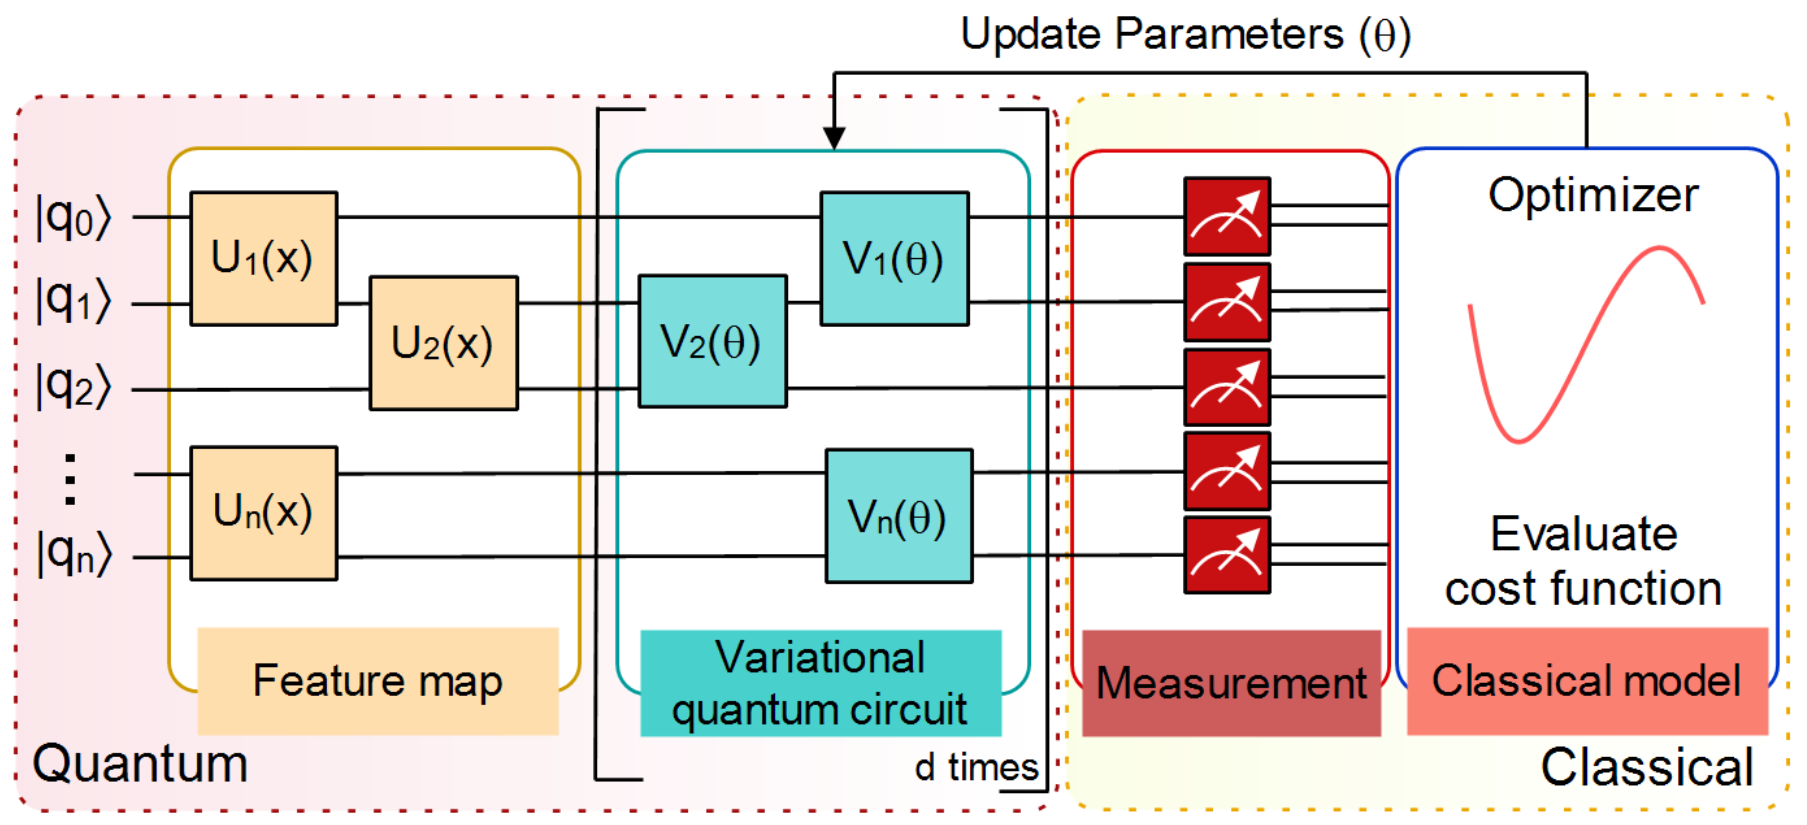

### Tipos Comunes de Algoritmos Variacionales

1. **Variational Quantum Eigensolver (VQE)**:
   - Utilizado principalmente para encontrar los estados de energía más bajos (autovalores) de un sistema cuántico, como en problemas de química cuántica.
   - VQE prepara un estado cuántico en un circuito parametrizado y mide la energía. Luego, un optimizador clásico ajusta los parámetros para minimizar la energía medida.

2. **Quantum Approximate Optimization Algorithm (QAOA)**:
   - Diseñado para resolver problemas de optimización combinatoria.
   - QAOA utiliza un enfoque parametrizado similar al VQE, pero está enfocado en encontrar aproximaciones cercanas a la solución óptima de problemas de optimización.

3. **Quantum Neural Networks (QNNs)**:
   - Inspiradas en las redes neuronales clásicas, las QNNs utilizan qubits y compuertas cuánticas para representar y manipular la información.
   - Los parámetros del circuito cuántico se entrenan utilizando algoritmos variacionales para aprender patrones y realizar tareas como la clasificación.

### Ventajas y Desafíos

**Ventajas**:
- Pueden aprovechar el **paralelismo cuántico** y las propiedades cuánticas como la **superposición** y el **entrelazamiento** para explorar espacios de solución más rápidamente que los algoritmos clásicos.
- Funcionan **bien con el hardware cuántico ruidoso** disponible actualmente.

**Desafíos**:
- Requieren **algoritmos de optimización clásicos eficientes** para ajustar los parámetros del circuito cuántico.
- Sensibles al ruido y a los errores en los qubits, lo que puede afectar la precisión de las soluciones.

$$ $$
$$ $$
$$ $$
<a id="3.1"></a>
## 3.1. Ejemplo sencillo de Algoritmo Variacional

Vamos a hacer un algoritmo capaz de encontrar un solo parámetro que define a un estado cuántico de un qubit.

Inicialmente queremos encontrar los grados a rotar un qubit que comienza en el estado $|0\rangle$ para que llegue al estado $|1\rangle$, haciendo una rotación alrededor del eje $X$.

<div align="center">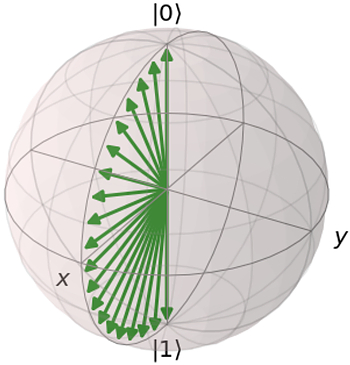

In [18]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.visualization import plot_bloch_multivector

import numpy as np
from math import radians, degrees
from scipy.optimize import minimize


def costo_edo_1(average_state):
    return 1 - average_state


def average_cost(angle, fn_costo, shots=2000):

    qc = QuantumCircuit(1)

    qc.rx(radians(angle), 0)                 # rotación en X por una cantidad de 'angle' grados

    sv = qi.Statevector(qc)
    counts = sv.sample_counts(shots=shots)

    average_state = (counts['1'] if '1' in counts else 0)/shots

    average_cost = fn_costo(average_state)

    print('Intento: ángulo =', angle, 'produce un costo promedio =', average_cost)

    return average_cost

Definimos un valor inicial para el parámetro que estamos buscando.

In [19]:
initial_guess = 90

Usamos la función `minimize` del paquete `scipy` para encontrar el valor del ángulo que estamos buscando:

In [20]:
result = minimize(average_cost, initial_guess, args=(costo_edo_1,), method='Powell')

Intento: ángulo = [90.] produce un costo promedio = 0.494
Intento: ángulo = [90.] produce un costo promedio = 0.494
Intento: ángulo = [91.] produce un costo promedio = 0.493
Intento: ángulo = [92.618034] produce un costo promedio = 0.485
Intento: ángulo = [95.23606803] produce un costo promedio = 0.485
Intento: ángulo = [93.61803398] produce un costo promedio = 0.46699999999999997
Intento: ángulo = [94.23606797] produce un costo promedio = 0.47550000000000003
Intento: ángulo = [93.57664179] produce un costo promedio = 0.4665
Intento: ángulo = [93.21048621] produce un costo promedio = 0.487
Intento: ángulo = [93.43678281] produce un costo promedio = 0.48550000000000004
Intento: ángulo = [93.52322041] produce un costo promedio = 0.4325
Intento: ángulo = [93.48798821] produce un costo promedio = 0.48
Intento: ángulo = [97.04644083] produce un costo promedio = 0.4415
Intento: ángulo = [93.52322041] produce un costo promedio = 0.4665
Intento: ángulo = [97.04644083] produce un costo promedio

/tmp/ipython-input-3272002094.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  qc.rx(radians(angle), 0)                 # rotación en X por una cantidad de 'angle' grados


In [21]:
print('\nÁngulo optimizado en grados:', [a % 360 for a in result.x])


Ángulo optimizado en grados: [np.float64(179.25996246688555)]


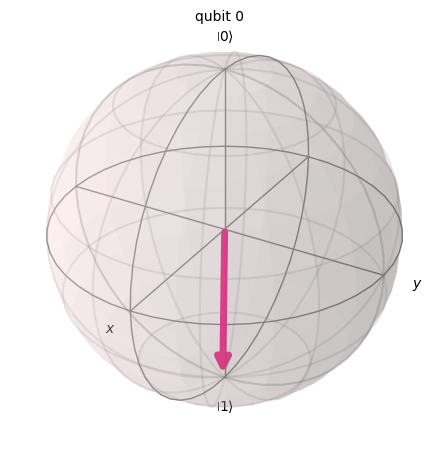

In [22]:
qc = QuantumCircuit(1)
qc.rx(radians(result.x[0]), 0)

sv = qi.Statevector(qc)
plot_bloch_multivector(sv)

Ahora encontremos el valor del ángulo necesario para terminar en el estado $|-i\rangle$:

In [23]:
def costo_edo_menos_y(average_state):
    return (average_state - 0.5)**2

initial_guess = 0

result = minimize(average_cost, initial_guess, args=(costo_edo_menos_y,), method='Powell')

/tmp/ipython-input-3272002094.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  qc.rx(radians(angle), 0)                 # rotación en X por una cantidad de 'angle' grados


Intento: ángulo = [0.] produce un costo promedio = 0.25
Intento: ángulo = [0.] produce un costo promedio = 0.25
Intento: ángulo = [1.] produce un costo promedio = 0.24950025
Intento: ángulo = [2.618034] produce un costo promedio = 0.25
Intento: ángulo = [1.61803397] produce un costo promedio = 0.24950025
Intento: ángulo = [1.99999998] produce un costo promedio = 0.24950025
Intento: ángulo = [2.23606797] produce un costo promedio = 0.25
Intento: ángulo = [1.85410196] produce un costo promedio = 0.25
Intento: ángulo = [2.09016993] produce un costo promedio = 0.24850225
Intento: ángulo = [2.14589802] produce un costo promedio = 0.25
Intento: ángulo = [2.05572807] produce un costo promedio = 0.24950025
Intento: ángulo = [2.11145616] produce un costo promedio = 0.25
Intento: ángulo = [4.18033985] produce un costo promedio = 0.24950025
Intento: ángulo = [2.09016993] produce un costo promedio = 0.25
Intento: ángulo = [4.18033985] produce un costo promedio = 0.24950025
Intento: ángulo = [7.562

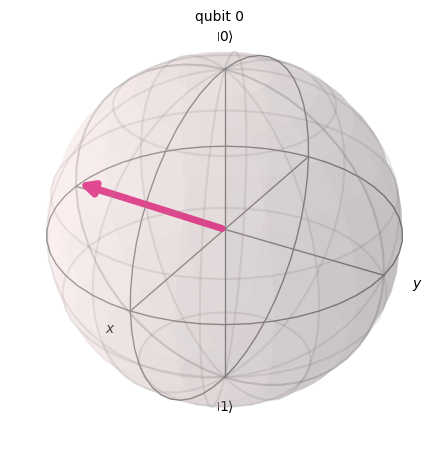

In [24]:
qc = QuantumCircuit(1)
qc.rx(radians(result.x[0]), 0)

sv = qi.Statevector(qc)
plot_bloch_multivector(sv)

<a id="3.2"></a>
## 3.2. Quantum Machine Learning

La idea básica es que queremos combinar conceptos de **Machine Learning** y **Computación Cuántica**

- Machine Learning: aprender patrones a partir de algunos datos de entrenamiento
- Computación Cuántica: uso de recursos mecánicos cuánticos para resolver problemas computacionales potencialmente más eficientemente

Podemos clasificar los tipos de ML/QML en las cuatro categorías siguientes:

<div align="center">
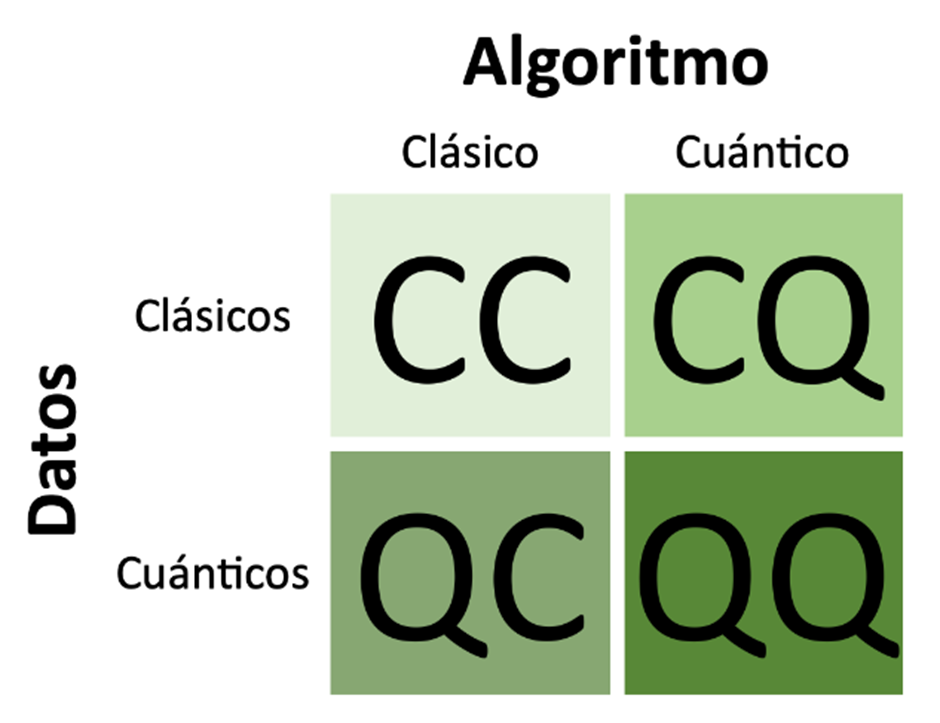

<a id="3.2.1"></a>
### 3.2.1. Qiskit Machine Learning

Qiskit Machine Learning introduce bloques de construcción computacionales fundamentales, como kernels cuánticos y redes neuronales cuánticas, que se utilizan en diferentes aplicaciones, incluidas la clasificación y la regresión. Por un lado, este diseño es muy fácil de usar y permite a los usuarios crear rápidamente un prototipo de un primer modelo sin conocimientos profundos de computación cuántica. Por otro lado, Qiskit Machine Learning es muy flexible y los usuarios pueden ampliarlo fácilmente para respaldar la investigación de vanguardia en aprendizaje automático cuántico.

In [1]:
!pip install qiskit-algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 6.4 MB/s eta 0:00:00


In [2]:
!pip install qiskit-machine-learning

El código a continuación necesita las siguientes clases:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42   # para reproducibilidad de resultados

### Ejemplo: Clasificación

Preparamos un conjunto de datos de clasificación simple, generando $20$ valores muestra, cada uno una tupla $(x_1,x_2)$ y definiendo su resultado $y$ dependiendo de si su suma es mayor a $0$ o no, asignando $\{1, 0\}$ respectivamente.

En la variable `y_one_hot` se guarda la codificación [one-hot](https://en.wikipedia.org/wiki/One-hot).

En la variable `y` se reetiquetan las muestras con valores $\{-1, +1\}$, los cuales son usados para decidir de qué color se mostrará la muestra en la gráfica, los valores con la etiqueta $+1$ son los que están por encima de la línea $x=-y$ y los de etiqueta $-1$ son los que están por debajo de dicha línea.

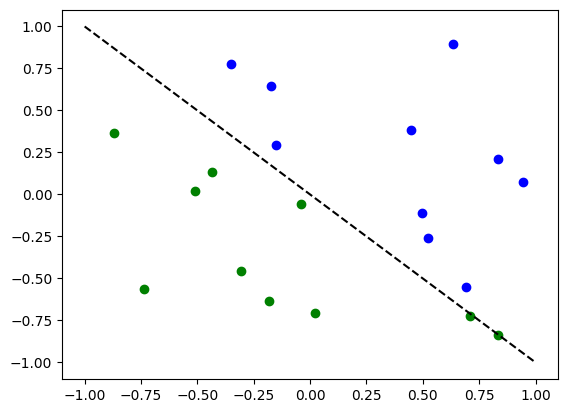

In [4]:
num_inputs = 2                                             # cantidad de entradas (primera capa de la red neuronal)

num_samples = 20                                           # cantidad de muestras para entrenar la red neuronal

X = 2*np.random.rand(num_samples, num_inputs) - 1          # de manera aleatoria creamos lo valores que entran a la capa 1
                                                           # estos son dos valores (inputs) por cada muestra

y01 = 1*(np.sum(X, axis=1) >= 0)                           # si la suma de los dos valores (de cada muestra) es >= 0
                                                           # (es decir, están arriba de la línea x=-y en el plano)
                                                           # entonces lo clasificamos con la etiqueta '1', caso contrario
                                                           # con la etiqueta '0', así los valores de y01 ∈ {0, 1}


y = 2*y01-1                                                # en esta variable reetiquetamos con: y ∈ {-1, +1}

y_one_hot = np.zeros((num_samples, 2))                     # variable para la codificación one-hot

for i in range(num_samples):                               # generamos los valores one-hot de cada muestra usando y01
    y_one_hot[i, y01[i]] = 1                               # si el valor en y01[i] = 0, entonces y_one_hot_i = [1, 0]
                                                           # pero si y01[i] = 1, entonces y_one_hot_i = [0, 1]


for x, y_target in zip(X, y):                              # iteramos sobre las muestras y sus respectivos resultados
    if y_target == 1:                                      # si se trata de una muestra con resultado etiquetado con '+1'
        plt.plot(x[0], x[1], 'bo')                         # la dibujamos en azul
    else:                                                  # si la muestra tiene un resultado con la etiqueta '-1'
        plt.plot(x[0], x[1], 'go')                         # entonces la dibujamos en verde


plt.plot([-1, 1], [1, -1], '--', color='black')            # definimos el plot con la línea x = -y
plt.show()                                                 # mostramos el plot

Se puede usar un `EstimatorQNN` (hereda de `NeuralNetwork`) para la clasificación dentro de una `NeuralNetworkClassifier`. En este contexto, se espera que `EstimatorQNN` devuelva una salida unidimensional en $\left[-1,+1\right]$. Esto solo funciona para la clasificación binaria y asignamos las dos clases a $\{-1,+1\}$. Esta clase necesita un [mapa de características](https://computersciencewiki.org/index.php/Feature_maps_(Activation_maps)) y un [ansatz](https://en.wikipedia.org/wiki/Ansatz).

$$ $$

Un **feature map** (mapa de características) es una técnica utilizada para codificar datos clásicos en un estado cuántico. Su objetivo es transformar los datos de entrada en un espacio de características (feature space) más elevado donde los datos pueden ser procesados por algoritmos cuánticos de manera más efectiva.

El `ZZFeatureMap` de Qiskit es un ejemplo específico de un _feature map_. Este mapa de características utiliza una combinación de compuertas Hadamard y rotaciones controladas $ZZ$ para codificar las características de los datos en qubits.

$$ $$

La palabra **ansatz** proviene del alemán y significa "aproximación" o "suposición". En el contexto de la computación cuántica, un _ansatz_ se refiere a una suposición sobre la forma de la solución cuántica que se utiliza para encontrar una solución aproximada a un problema.

Los _circuitos ansatz_ están formados por compuertas cuánticas parametrizadas. Estos parámetros se ajustan durante el proceso de optimización para minimizar una función de costo específica.

El `RealAmplitudes` es un circuito ansatz predefinido en Qiskit, utilizado frecuentemente en algoritmos variacionales y otras aplicaciones de QML. Este tipo de ansatz es conocido por su simplicidad y eficacia en capturar la estructura de los estados cuánticos que se desean aproximar. Consiste en una secuencia de compuertas parametrizadas que aplican rotaciones en el eje $Y$ a cada qubit, seguidas de capas de entrelazamiento entre los qubits.

<div align="center">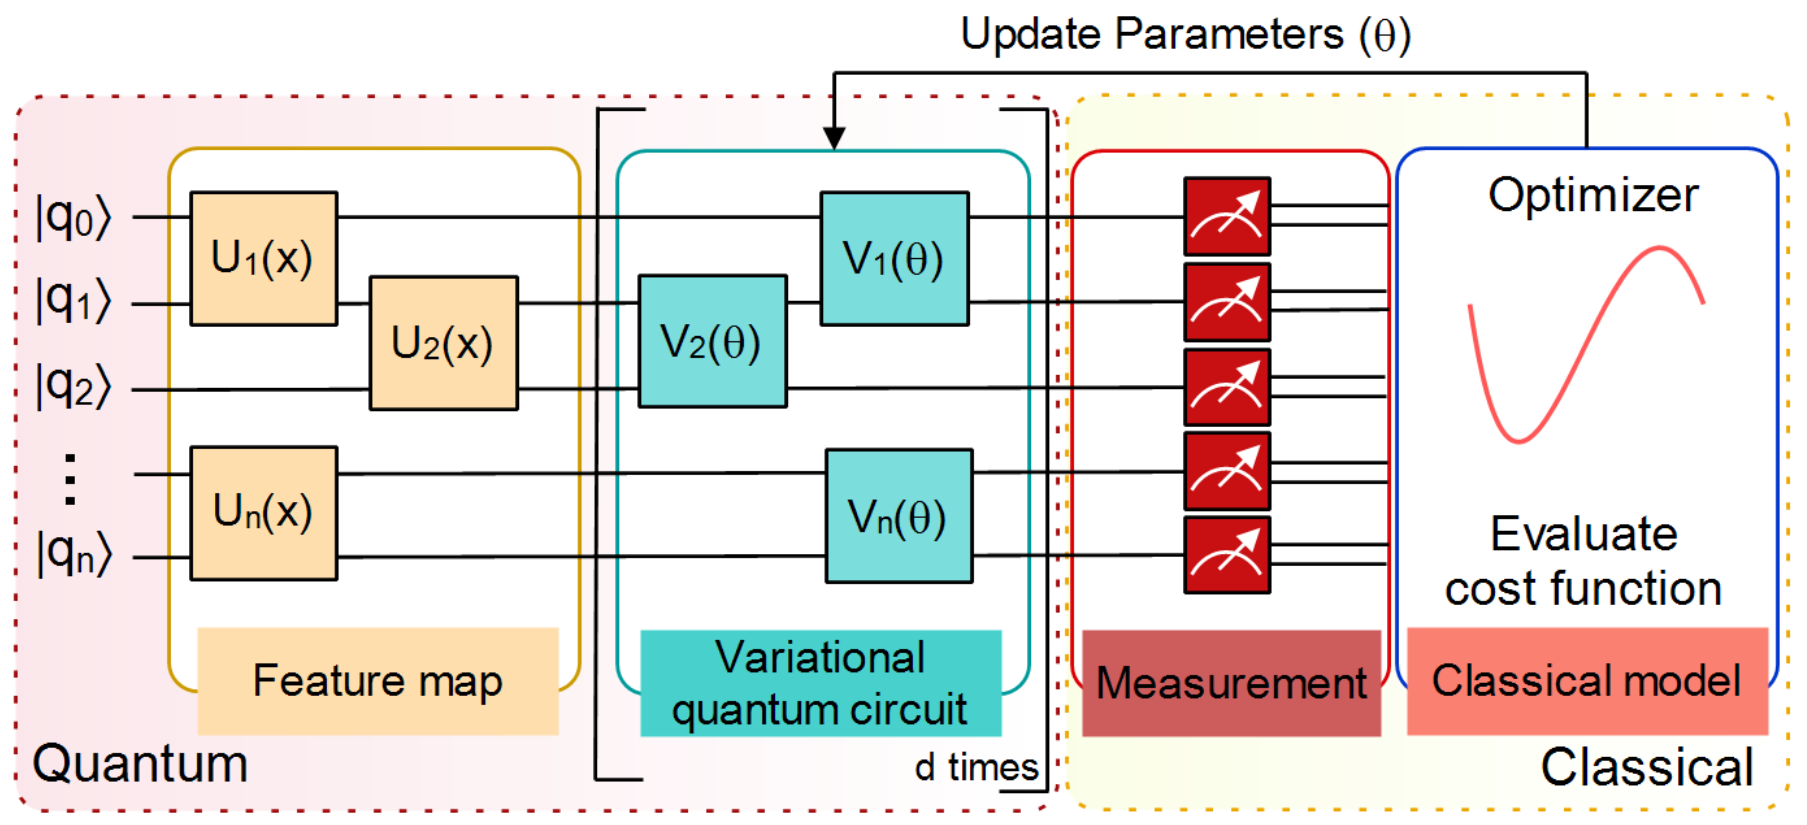

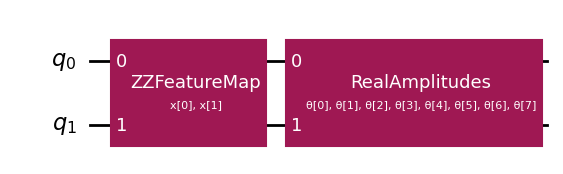

In [5]:
# construir la QNN
qc = QuantumCircuit(2)

feature_map = ZZFeatureMap(2)    # para mapear las características originales a unas nuevas, unas que sean cuánticas

ansatz = RealAmplitudes(2)       # circuito inicial, se usa una 'educated guess' (ansatz), en particular el llamado RealAmplitudes
                                 # este es el modelo que queremos optimizar
                                 # repeticiones = 3 (valor default)

qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")

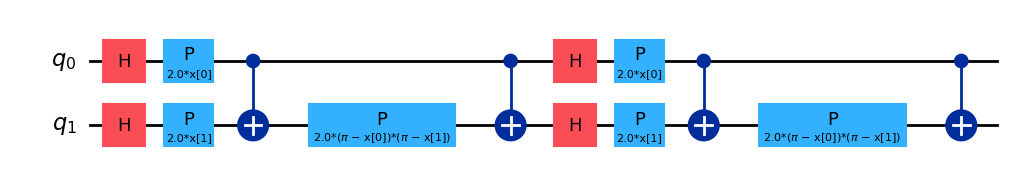

In [6]:
# veamos el detalle del mapa de características
feature_map.decompose().draw(output="mpl")

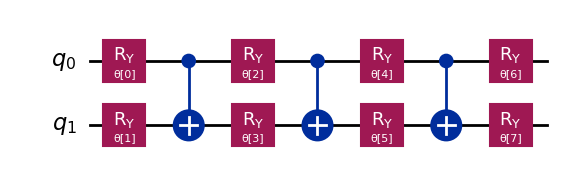

In [7]:
# veamos el detalle del ansatz
ansatz.decompose().draw(output="mpl")

In [8]:
estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

/tmp/ipython-input-738957043.py:1: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  estimator_qnn = EstimatorQNN(


In [9]:
# la QNN mapea las entradas a [-1, +1]
estimator_qnn.forward(X[0, :], algorithm_globals.random.random(estimator_qnn.num_weights))

# Args:
#      input_data: datos de entrada de la forma (num_inputs)
#      weights: pesos entrenables de la forma (num_weights)
# Returns:
#      El resultado de la red neuronal de la forma (output_shape)

array([[0.09008953]])

In [10]:
# función de devolución de llamada (callback) que dibuja un diagrama en tiempo real cuando se llama al método .fit()
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Valor de la función objetivo contra a la iteración")
    plt.xlabel("Iteración")
    plt.ylabel("Valor de la función objetivo")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [11]:
# construir un clasificador de red neuronal
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=60), callback=callback_graph
)

In [12]:
# crear una lista vacía para la devolución de llamada para almacenar evaluaciones de la función objetivo
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# ajustar el clasificador a los datos
estimator_classifier.fit(X, y)

# regresar al tamaño de figura predeterminado
plt.rcParams["figure.figsize"] = (6, 4)

# score del clasificador
estimator_classifier.score(X, y)

0.7

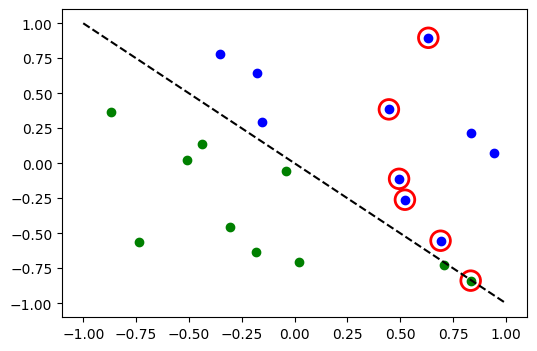

In [13]:
# evaluar los puntos de datos
y_predict = estimator_classifier.predict(X)                      # obtenemos las predicciones para todas las muestras


# graficar resultados
# rojo => clasificado incorrectamente

for x, y_target, y_p in zip(X, y, y_predict):                    # iteramos sobre todas las muestras
    if y_target == 1:                                            # si estaba clasificada con '+1'
        plt.plot(x[0], x[1], 'bo')                               # la dibujamos en azul
    else:                                                        # si estaba clasificada con '-1'
        plt.plot(x[0], x[1], 'go')                               # la dibujamos en verde
    if y_target != y_p:                                          # si la predicción es diferente a la etiqueta
                                                                 # colocamos un círculo rojo alrededor
        plt.scatter(x[0], x[1], s=200, facecolors='none', edgecolors='r', linewidths=2)


plt.plot([-1, 1], [1, -1], '--', color='black')                  # definimos el plot con la línea x = -y
plt.show()                                                       # mostramos el plot

In [14]:
estimator_classifier.weights

array([ 1.89081972,  2.03689629,  1.21892746,  0.62412567,  1.09948657,
        1.16404127, -0.16386541,  2.11393186])